In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/cansim-0800020-eng-6674700030567901031.csv',skiprows=6,skipfooter=9,engine='python')
df.head()

,Adjustments,Unadjusted,Seasonally adjusted
0,Jan-1991,12588862,15026890
1,Feb-1991,12154321,15304585
2,Mar-1991,14337072,15413591
3,Apr-1991,15108570,15293409
4,May-1991,17225734,15676083


In [3]:
from pandas.tseries.offsets import MonthEnd

In [4]:
df['Adjustments'] = pd.to_datetime(df['Adjustments']) + MonthEnd(1)
df = df.set_index('Adjustments')
df.head()

,Unadjusted,Seasonally adjusted
Adjustments,,
1991-01-31,12588862,15026890
1991-02-28,12154321,15304585
1991-03-31,14337072,15413591
1991-04-30,15108570,15293409
1991-05-31,17225734,15676083


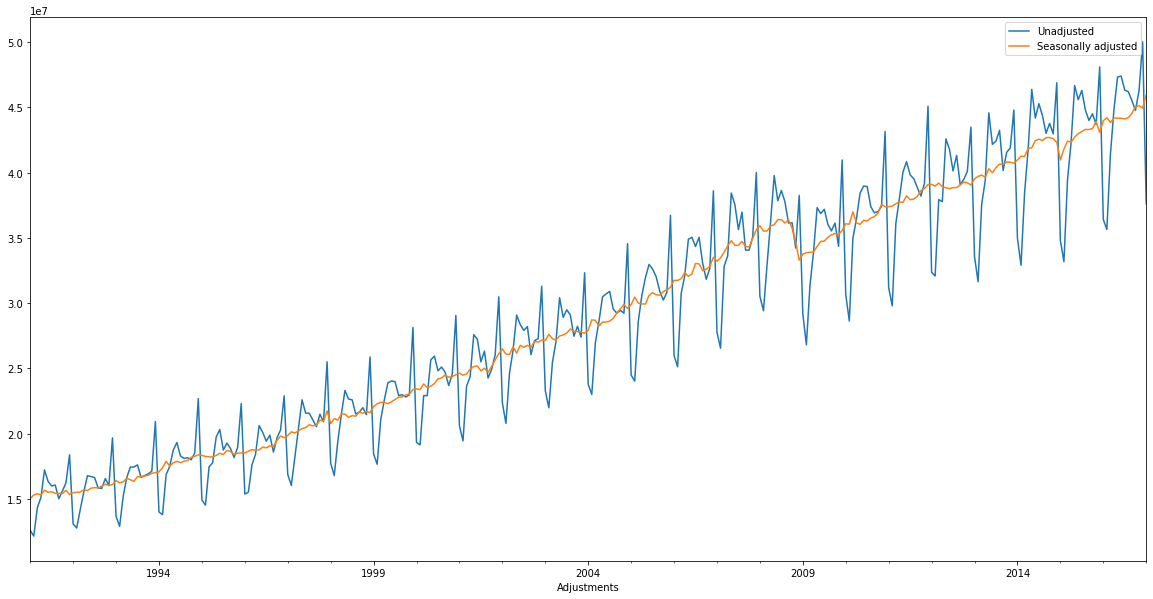

In [5]:
df.plot(figsize=(20,10))

In [6]:
split_date = pd.Timestamp('01-01-2011')

train = df.loc[:split_date, ['Unadjusted']]

test = df.loc[split_date:, ['Unadjusted']]

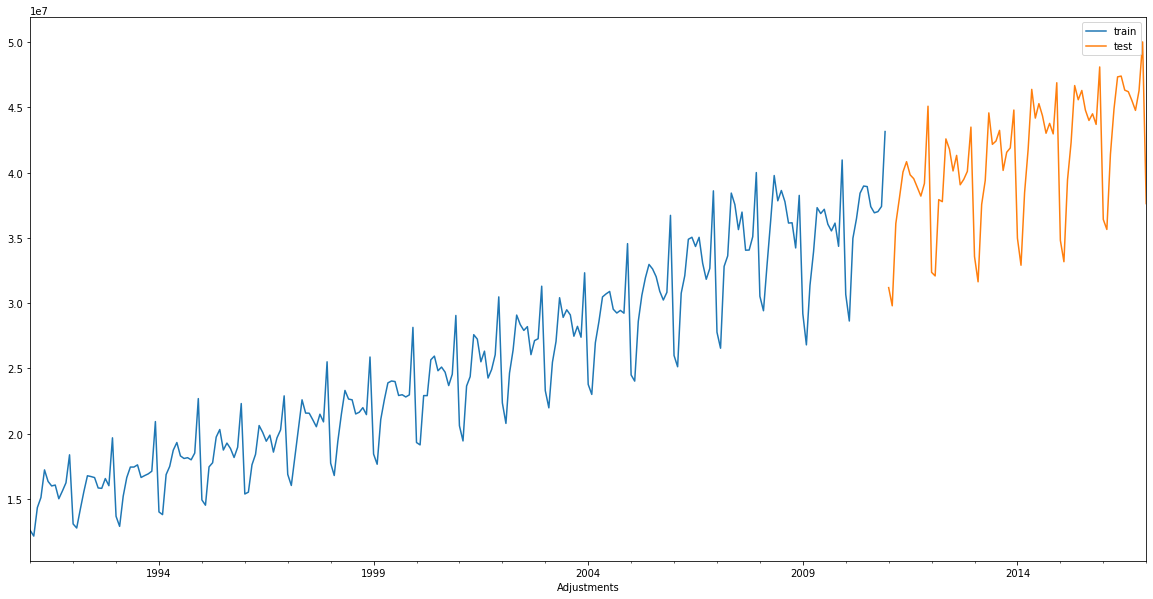

In [7]:
ax = train.plot(figsize=(20,10))
test.plot(ax=ax)
plt.legend(['train','test'])

In [8]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test) # assume you do not know the test data. Fitting the data is overfitting.

In [9]:
train_sc[:4] 
# Learning on the previous value is how the network operates. Sequentially building the model on each point

array([[0.01402033],
       [0.        ],
       [0.0704258 ],
       [0.09531795]])

In [10]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]


### Fully Connected Predictor - Vanilla RNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [12]:
K.clear_session()

model = Sequential()
model.add(Dense(12,input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [13]:
early_stop = EarlyStopping(monitor='loss',patience=1,verbose=1)

In [14]:
model.fit(X_train,y_train, epochs=200,batch_size=2,verbose=1,callbacks=[early_stop])

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
120/120 [==============================] - 0s 436us/step - loss: 0.1427
Epoch 2/200
120/120 [==============================] - 0s 450us/step - loss: 0.0209
Epoch 3/200
120/120 [==============================] - 0s 486us/step - loss: 0.0144
Epoch 4/200
120/120 [==============================] - 0s 502us/step - loss: 0.0144
Epoch 5/200
120/120 [=====================

In [15]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


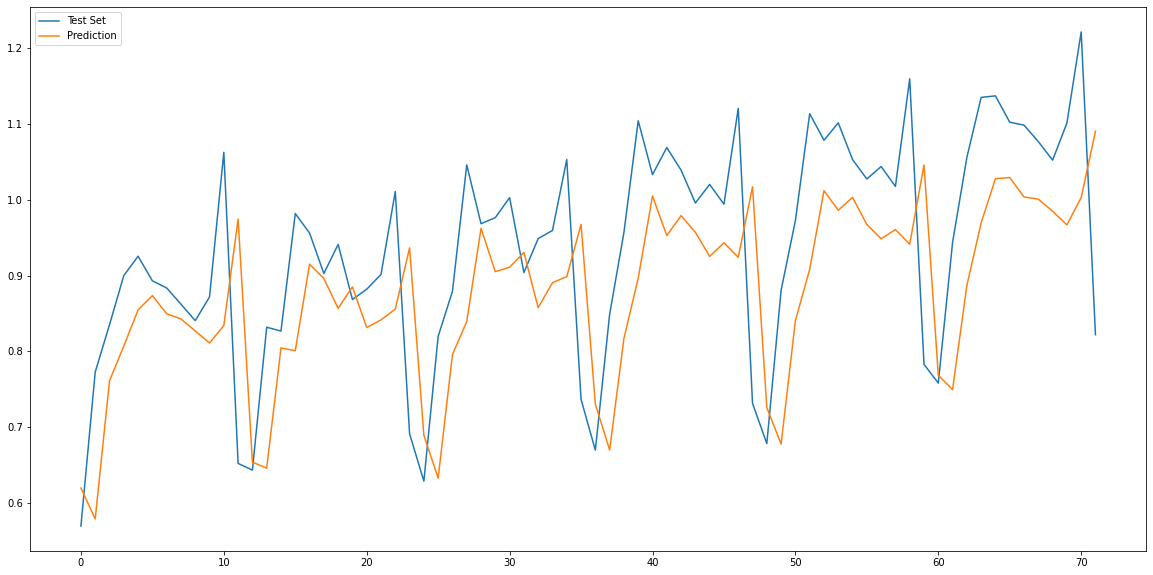

In [16]:
plt.figure(figsize=(20,10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Test Set','Prediction'])

### Recurrent Prediction - LSTM

In [17]:
from keras.layers import LSTM

In [18]:
X_train.shape

(239, 1)

In [19]:
# 3D tensor with shape (batch_size, timesteps, input_dim)
X_train[:,None].shape

(239, 1, 1)

In [20]:
X_train = X_train[:,None]
X_test = X_test[:,None]

In [21]:
K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1,1)))

model.add(Dense(1))

model.summary()

model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 192       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train, epochs=100, batch_size=1,verbose=1,callbacks=[early_stop])

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
239/239 [==============================] - 1s 788us/step - loss: 0.1969
Epoch 2/100
239/239 [==============================] - 0s 768us/step - loss: 0.0480
Epoch 3/100
239/239 [==============================] - 0s 760us/step - loss: 0.0327
Epoch 4/100
239/239 [==============================] - 0s 746us/step - loss: 0.0277
Epoch 5/100
239/239 [=====================

In [23]:
y_pred = model.predict(X_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


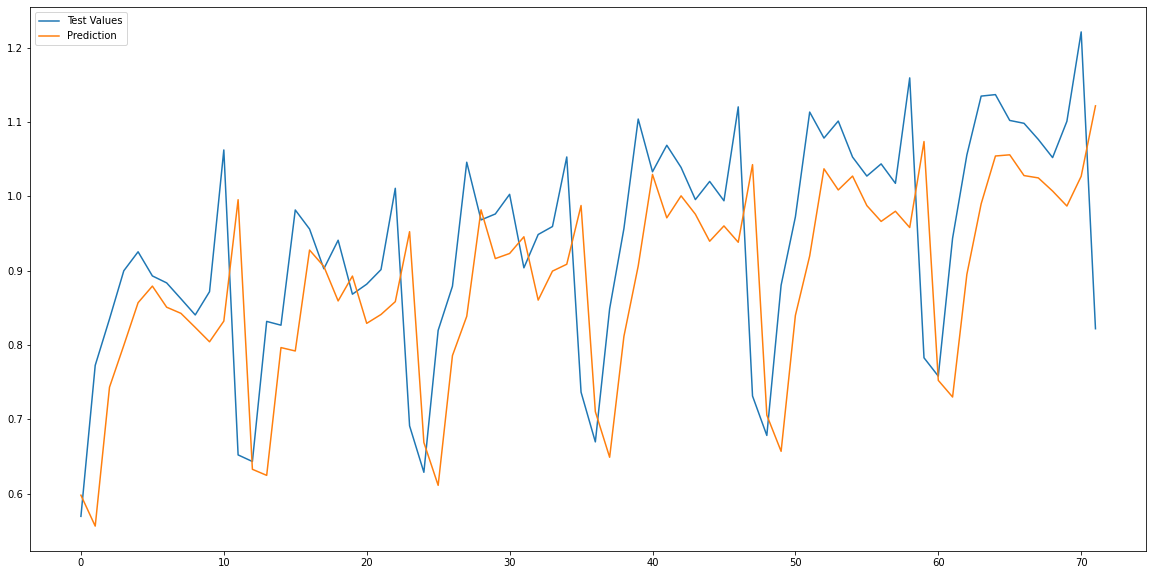

In [24]:
plt.figure(figsize=(20,10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Test Values','Prediction'])

### Rolling Window Implementation

In [25]:
train_sc.shape

(240, 1)

In [27]:
train_sc_df = pd.DataFrame(train_sc, columns=['Scaled'],index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'],index=test.index)
train_sc_df.head()

,Scaled
Adjustments,
1991-01-31,0.014020
1991-02-28,0.000000
1991-03-31,0.070426
1991-04-30,0.095318
1991-05-31,0.163628


In [29]:
for s in range(1,13):
    train_sc_df[f'Shift_{s}'] = train_sc_df['Scaled'].shift(s)
    test_sc_df[f'Shift_{s}'] = test_sc_df['Scaled'].shift(s)
    
train_sc_df.head(13)

In [32]:
X_train = train_sc_df.dropna().drop('Scaled',axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled',axis=1)
y_test = test_sc_df.dropna()[['Scaled']]

In [34]:
X_train
# Here we have altered the data to reflect monthly values column wise instead of row wise
# Shift_12 in row one is the first month in the dataset
# The data eleminates the oldest data (shift_12) in each subsequent row

,Shift_1,Shift_2,Shift_3,Shift_4,Shift_5,Shift_6,Shift_7,Shift_8,Shift_9,Shift_10,Shift_11,Shift_12
Adjustments,,,,,,,,,,,,
1992-01-31,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000,0.014020
1992-02-29,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426,0.000000
1992-03-31,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318,0.070426
1992-04-30,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628,0.095318
1992-05-31,0.109831,0.065964,0.019993,0.030027,0.200913,0.131738,0.111395,0.092309,0.126174,0.123958,0.135141,0.163628
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-31,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447,0.770968
2010-09-30,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687,0.754447
2010-10-31,0.799167,0.814394,0.863983,0.865311,0.847598,0.784536,0.736050,0.531665,0.597349,0.929722,0.716290,0.773687


In [35]:
X_train.shape

(228, 12)

In [36]:
X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values

### Fully Connected Network with Rolling Windows

In [37]:
K.clear_session()

model = Sequential()
model.add(Dense(12,input_dim=12, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam') 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                156       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train,y_train, epochs=200,batch_size=2,verbose=1,callbacks=[early_stop])

Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 414us/step - loss: 0.0229
Epoch 2/200
114/114 [==============================] - 0s 413us/step - loss: 0.0108
Epoch 3/200
114/114 [==============================] - 0s 431us/step - loss: 0.0105
Epoch 4/200
114/114 [==============================] - 0s 422us/step - loss: 0.0065
Epoch 5/200
114/114 [=====================

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


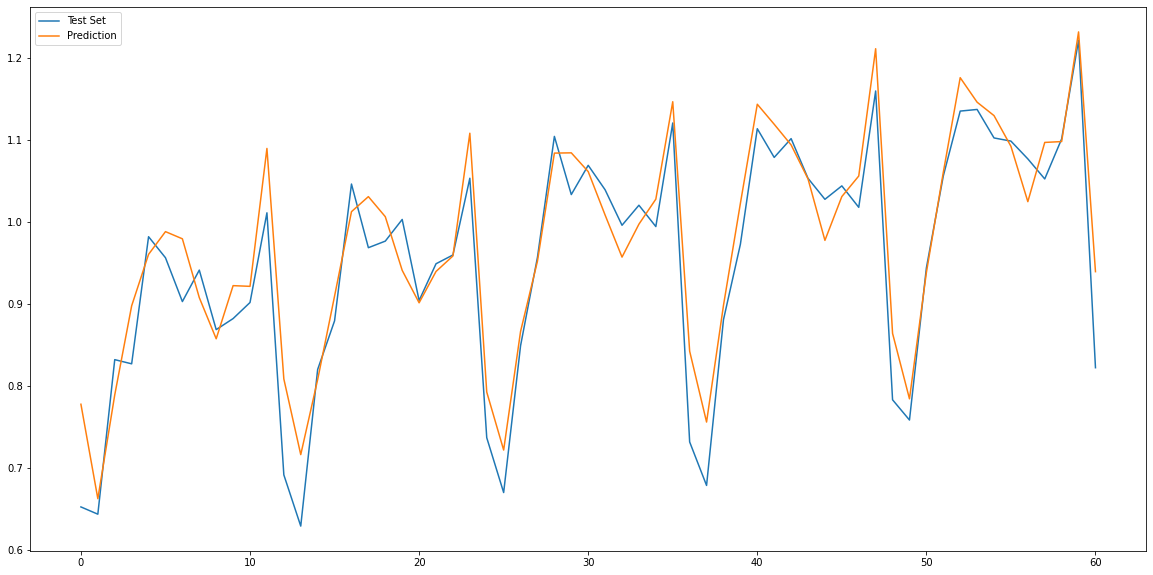

In [39]:
y_pred = model.predict(X_test)
plt.figure(figsize=(20,10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Test Set','Prediction'])

### LSTM with Rolling Windows

In [40]:
X_train_t = X_train.reshape(X_train.shape[0],1,12)
X_test_t = X_test.reshape(X_test.shape[0],1,12)

In [53]:
X_train_t.shape

(228, 1, 12)

In [56]:
K.clear_session()
model = Sequential()
model.add(LSTM(6, input_shape=(1,12)))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6)                 456       
_________________________________________________________________
dense (Dense)                (None, 1)                 7         
Total params: 463
Trainable params: 463
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.fit(X_train_t,y_train, epochs=100, batch_size=1,verbose=1,callbacks=[early_stop])
y_pred = model.predict(X_test_t)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
228/228 [==============================] - 1s 796us/step - loss: 0.1348
Epoch 2/100
228/228 [==============================] - 0s 741us/step - loss: 0.0082
Epoch 3/100
228/228 [==============================] - 0s 748us/step - loss: 0.0077
Epoch 4/100
228/228 [==============================] - 0s 827us/step - loss: 0.0054
Epoch 5/100
228/228 [=====================

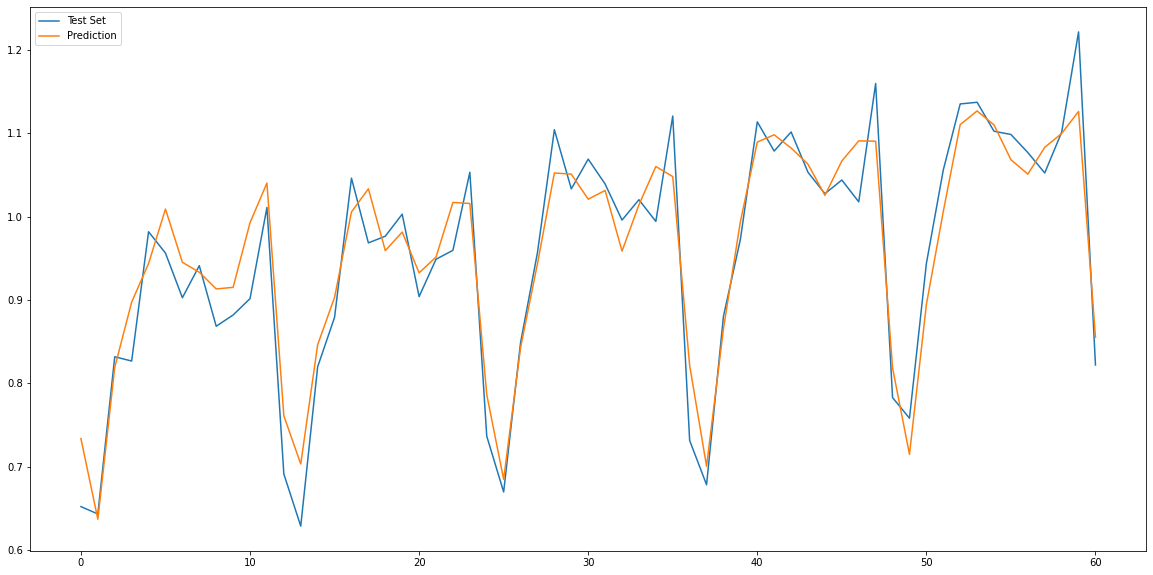

In [58]:
plt.figure(figsize=(20,10))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Test Set','Prediction'])